In [2]:
!wget https://direct-file-upload.hostfl.ru/files/Genshin_Impact_Characters.xlsx

--2024-04-18 04:35:37--  https://direct-file-upload.hostfl.ru/files/Genshin_Impact_Characters.xlsx
Resolving direct-file-upload.hostfl.ru (direct-file-upload.hostfl.ru)... 178.208.86.166
Connecting to direct-file-upload.hostfl.ru (direct-file-upload.hostfl.ru)|178.208.86.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8231 (8.0K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘Genshin_Impact_Characters.xlsx’

Genshin_Impact_Char 100%[===================>]   8.04K  --.-KB/s    in 0s      

2024-04-18 04:35:37 (192 MB/s) - ‘Genshin_Impact_Characters.xlsx’ saved [8231/8231]



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import warnings

In [4]:
file_path = "Genshin_Impact_Characters.xlsx"

df = pd.read_excel(file_path)

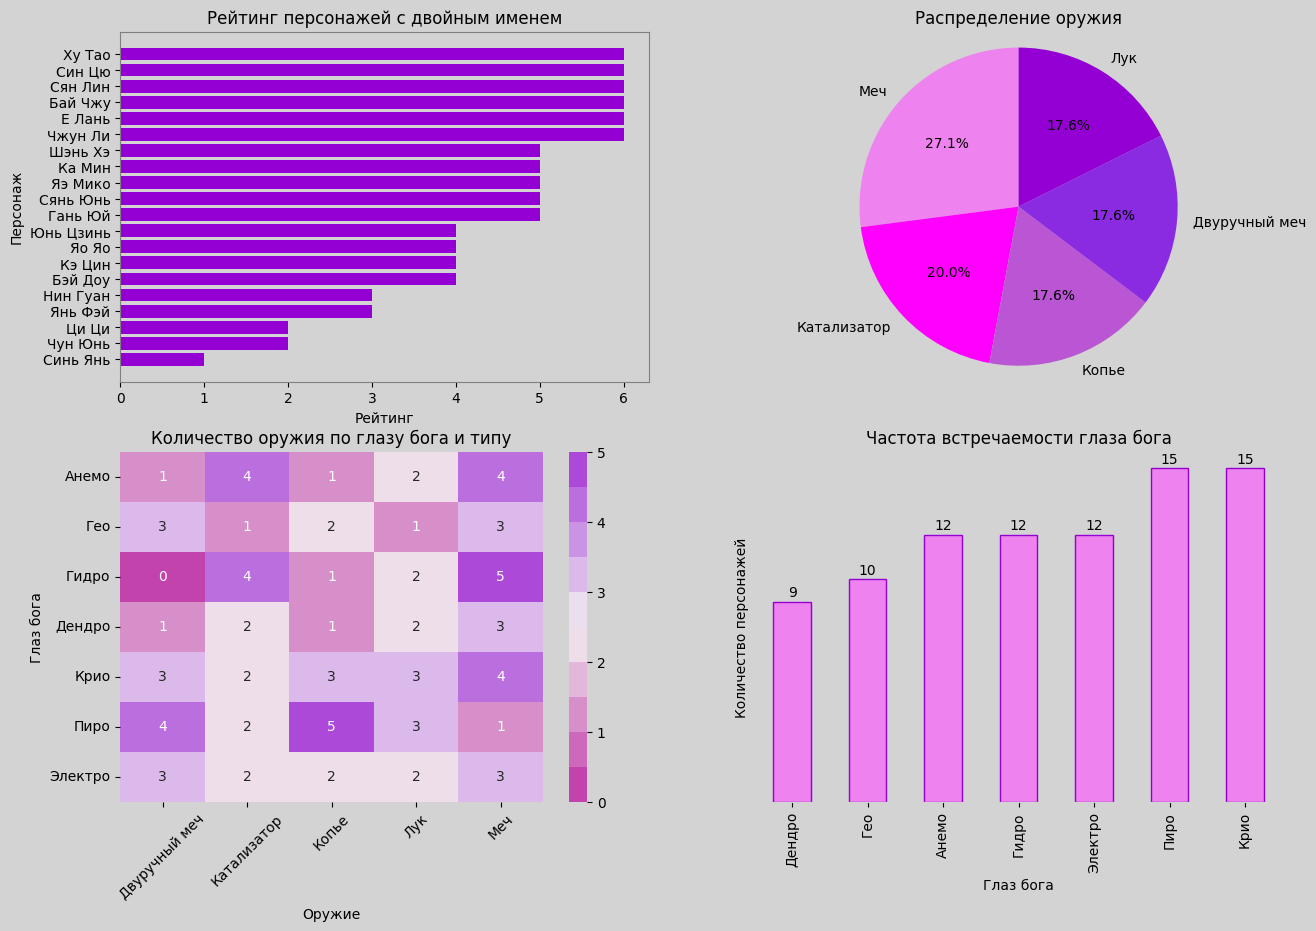

In [10]:
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

characters_with_spaces = df[df['name'].str.contains(' ') & ~df['name'].str.contains('Путешественник')]

rating_mapping = {'D': 1, 'C': 2, 'B': 3, 'A': 4, 'S': 5, 'S+': 6}
characters_with_spaces['rating_numeric'] = characters_with_spaces['rating'].map(rating_mapping)
characters_with_spaces = characters_with_spaces.sort_values(by='rating_numeric')


axs[0,0].barh(characters_with_spaces['name'], characters_with_spaces['rating_numeric'], color='darkviolet')
axs[0,0].set_xlabel('Рейтинг')
axs[0,0].set_ylabel('Персонаж')
axs[0,0].set_title('Рейтинг персонажей с двойным именем')

axs[0,0].spines['top'].set_color('grey')
axs[0,0].spines['right'].set_color('grey')
axs[0,0].spines['bottom'].set_color('grey')
axs[0,0].spines['left'].set_color('grey')
axs[0,0].set_facecolor('lightgrey')

weapon = df['weapon'].value_counts()
weapon.plot.pie(autopct='%1.1f%%', ax=axs[0,1], startangle=90, colors=['violet',  'magenta', 'mediumOrchid', 'blueViolet', 'darkviolet'])
axs[0,1].set_title('Распределение оружия')
axs[0,1].set_ylabel(None)
axs[0,1].axis('equal')

pivot_table = df.pivot_table(index='gods_eye', columns='weapon', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, ax=axs[1,0], annot=True, cmap=sns.diverging_palette(320, 290, s=75, l=50, n=10), fmt='g', yticklabels=pivot_table.index)
axs[1,0].set_xlabel('Оружие')
axs[1,0].set_ylabel('Глаз бога')
axs[1,0].set_title('Количество оружия по глазу бога и типу')
axs[1,0].tick_params(axis='y', rotation=0)
axs[1,0].tick_params(axis='x', rotation=45)

gods_eye = df['gods_eye'].value_counts().sort_values()
gods_eye.plot(kind='bar', ax=axs[1, 1], color='violet', edgecolor='darkviolet')
for i, count in enumerate(gods_eye):
    axs[1,1].text(i, count+0.1, str(count), va='bottom', ha='center')

axs[1,1].set_xlabel('Глаз бога')
axs[1,1].set_ylabel('Количество персонажей')
axs[1,1].set_title('Частота встречаемости глаза бога')
axs[1,1].set_yticks([])
axs[1,1].set_facecolor('lightgrey')

axs[1,1].spines['top'].set_color('lightgrey')
axs[1,1].spines['right'].set_color('lightgrey')
axs[1,1].spines['bottom'].set_color('lightgrey')
axs[1,1].spines['left'].set_color('lightgrey')


fig.set_facecolor('lightgrey')
plt.show();

In [6]:
def search_character(rarity, gods_eye, weapon, rating):
    result = df[(df['rarity'] == rarity) &
                (df['gods_eye'] == gods_eye) &
                (df['weapon'] == weapon) &
                (df['rating'] == rating)]
    display(result)

rarity_dropdown = widgets.Dropdown(options=df['rarity'].unique(), description='Редкость:')
gods_eye_dropdown = widgets.Dropdown(options=df['gods_eye'].unique(), description='Глаз бога:')
weapon_dropdown = widgets.Dropdown(options=df['weapon'].unique(), description='Оружие:')
valid_ratings = df['rating'].dropna().unique()
rating_order = ['S+', 'S', 'A', 'B', 'C', 'D']
rating_options = sorted(valid_ratings, key=lambda x: rating_order.index(x))
rating_dropdown = widgets.Dropdown(options=rating_options, description='Рейтинг:')

search_button = widgets.Button(description='Поиск')

def on_search_button_clicked(b):
    search_character(rarity_dropdown.value, gods_eye_dropdown.value, weapon_dropdown.value, rating_dropdown.value)

search_button.on_click(on_search_button_clicked)

# Отображение виджетов и кнопки
display(rarity_dropdown, gods_eye_dropdown, weapon_dropdown, rating_dropdown, search_button)

Dropdown(description='Редкость:', options=(5, 4), value=5)

Dropdown(description='Глаз бога:', options=('Пиро', 'Гео', 'Анемо', 'Гидро', 'Крио', 'Дендро', 'Электро'), val…

Dropdown(description='Оружие:', options=('Копье', 'Меч', 'Катализатор', 'Двуручный меч', 'Лук'), value='Копье'…

Dropdown(description='Рейтинг:', options=('S+', 'S', 'A', 'B', 'C', 'D'), value='S+')

Button(description='Поиск', style=ButtonStyle())

,index_character,name,rarity,gods_eye,weapon,rating
54,54,Ху Тао,5,Пиро,Копье,S+
